In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
data = pd.read_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v11/Model_Training/v11_3.xlsx", sheet_name = 'ren_orig_updated')
data.head()

,OpportunityID_ren,CreatedDate,FundedDate,OpportunityName,Priordeal_OppID,Renewal_PreviousCollectionStatus,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,...,Industry,Industry_Group__c,Avg_ReturnItemdays,LatestMonth_ReturnItemDays,PctChangeInReveune,PctAvgDailybalance2AvgMonthlyDeposits,TwoMonthAvg_AdjustedMonthlyDeposits,AdjustedMonthlyDeposits,drop_percent,Drop_category
0,0062M00000mfyvzQAA,2021-04-13 20:40:51,2021-04-14,T&H Lift Truck Service-Renewal Deal-04132021,0062M00000lqoSOQAY,Other,100.00,1.00,572.0,4,...,Services,"75 - Automotive Repair, Services, and Parking",0.00,0.0,0.187927,0.263167,17637.114000,15413.96,-12.604953,Negative
1,0062M00000oBKTtQAO,2022-02-10 19:15:46,2022-02-16,Cny Premier Sc-Renewal Deal-02102022,0062M00000noo9UQAQ,Other,100.00,0.67,633.0,1,...,Services,83 - Social Services,0.00,NaN,-0.477506,0.478737,47297.095714,14919.60,-68.455577,Negative
2,0062M00000jxpORQAY,2020-05-27 14:47:00,2020-06-02,ARQ HT Design Group-Renewal Deal-05272020,0062M00000jKGB5QAO,Default,87.59,0.86,607.0,3,...,Services,"87 - Engineering, Accounting, Research, Manage...",0.00,NaN,-0.096158,0.053412,56174.371428,76940.40,36.967089,Positive
3,0062M00000mTyJXQA0,2021-08-16 16:47:00,2021-08-16,Metro Trucking Group-Renewal Deal-08162021,0062M00000n0L40QAE,Default,97.48,0.61,640.0,3,...,Transportation & Public Utilities,42 - Motor Freight Transportation and Warehousing,0.00,0.0,0.105052,0.087083,31761.679230,35573.17,12.000278,Positive
4,0062M00000mzIjrQAE,2021-05-18 20:39:16,2021-05-19,Southern Belle Boutique By Dona-Renewal Deal-0...,0062M00000mfaVtQAI,Other,100.00,0.59,579.0,3,...,Retail,56 - Apparel and Accessory Stores,4.25,0.0,0.331790,0.007607,17696.500000,61805.50,249.252677,Positive


In [63]:
data1 = pd.read_excel("/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v11/Model_Training/v11_3.xlsx", sheet_name = 'Ren_orig')
data1.head()

,OpportunityID,CreatedDate,FundedDate,OpportunityName,Priordeal_OppID,Renewal_PreviousCollectionStatus,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_PreviousCreditScore,Renewal_CountPreviousDeals,...,Industry,Industry_Group__c,Avg_ReturnItemdays,LatestMonth_ReturnItemDays,PctChangeInReveune,PctAvgDailybalance2AvgMonthlyDeposits,TwoMonthAvg_AdjustedMonthlyDeposits,AdjustedMonthlyDeposits,drop_percent,Drop_category
0,0062M00000mTGVnQAO,2021-08-05 13:37:09,2021-08-10,Altitude Solutions Professional Services-New D...,0062M00000mhN0JQAU,Default,20.0,0.05,616.0,1,...,Services,"87 - Engineering, Accounting, Research, Manage...",0.0,NaN,-1.095377,2.337393,40417.822000,5474.06,-86.456316,Negative
1,0062M00000o96yhQAA,2022-01-14 16:05:25,2022-01-25,Dirty Dogs Self Service Dog Wash-New Deal-0114...,0062M00000ltrQ8QAI,Default,100.0,1.67,0.0,1,...,"Agriculture, Forestry, Fishing",07 - Agricultural Services,0.5,1.0,0.212900,0.465903,24938.318000,18952.29,-24.003342,Negative
2,0062M00000mfz6iQAA,2021-04-13 22:11:26,2021-04-19,Mana + Pua-Renewal Deal-04132021,0062M00000lvkcZQAQ,Other,100.0,0.65,513.0,1,...,Wholesale,51 - Wholesale Trade-Nondurable Good,2.0,2.0,0.151461,0.224922,67682.077777,46977.49,-30.590949,Negative
3,0062M00000lVi6gQAC,2020-10-01 18:18:23,2020-10-02,World Wide Windows-Renewal Deal-10012020,0062M00000jzxQuQAI,Other,100.0,1.00,517.0,1,...,Construction,17 - Construction Special Trade Contractors,0.0,0.0,-0.400179,0.337464,19060.590000,6068.49,-68.162108,Negative
4,0062M00000mg31dQAA,2021-04-14 17:48:32,2021-04-14,Tullus Properties-Renewal Deal-04142021,0062M00000lxWpgQAE,Other,100.0,0.50,599.0,1,...,"Finance, Insurance, Real Estate",65 - Real Estate,0.0,0.0,0.130666,0.050887,50438.125714,60408.48,19.767487,Positive


In [65]:
data.shape

(3540, 55)

In [64]:
data1.shape

(3539, 55)

In [66]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   OpportunityID                              3539 non-null   object        
 1   CreatedDate                                3539 non-null   datetime64[ns]
 2   FundedDate                                 3539 non-null   datetime64[ns]
 3   OpportunityName                            3539 non-null   object        
 4   Priordeal_OppID                            3539 non-null   object        
 5   Renewal_PreviousCollectionStatus           3539 non-null   object        
 6   Renewal_PreviousPace                       3525 non-null   float64       
 7   Renewal_PreviousPaidPercentageOfRTR        3525 non-null   float64       
 8   Renewal_PreviousCreditScore                3495 non-null   float64       
 9   Renewal_CountPrevio

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3540 entries, 0 to 3539
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   OpportunityID_ren                          3540 non-null   object        
 1   CreatedDate                                3540 non-null   datetime64[ns]
 2   FundedDate                                 3540 non-null   datetime64[ns]
 3   OpportunityName                            3540 non-null   object        
 4   Priordeal_OppID                            3540 non-null   object        
 5   Renewal_PreviousCollectionStatus           3540 non-null   object        
 6   Renewal_PreviousPace                       3526 non-null   float64       
 7   Renewal_PreviousPaidPercentageOfRTR        3526 non-null   float64       
 8   Renewal_PreviousCreditScore                3496 non-null   float64       
 9   Renewal_CountPrevio

In [68]:
data.shape

(3540, 55)

In [69]:
for i in data1.columns:
  if i not in data.columns:
    print(i)

OpportunityID


# Check Anomalies

1. Perform EDA
2. check wos - remove missing but give in excel sheet:
3. Specifically take care of no of bank statements and all other attributes related to it:
4. Check again the pace rates - {check for extreme weird values} - min_val_check
5. Check for anomalies - time in business -ve_values
6. is this business home based - flag based  -
7. take care of features to be dropped - take previous references
8. fill the missing values - so as to keep the progress alive: 
9. EDA is completed - save the file

In [70]:
numerical_attributes = data.columns[data.dtypes!="object"]
categorical_attributes = data.columns[data.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 47 

Index(['CreatedDate', 'FundedDate', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_PreviousCreditScore',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousHBwoLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'Last3Months_MA_OverdraftDays',
       'Last3Months_MA_NumReturnItems', 'Last3Months_Sum_NumReturnItems',
       'LastBankStatement_OverdraftDays',
       'Last3Months_MA_AdjustedMonthlyDeposits',
       'Last3Months_MA_AvgDailyBalance', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'HBwoLCF', 'Contract_HoldBack__c',
       'Last3Statments_MA_AdjustedMonthlyDeposits',
       'Last3Statments_MA_AvgDailyBalance', 'Last3Statments_MA_ReturnItemDays',
       'Last3Statments_MA_Ove

In [71]:
len(data.isna().sum().sort_values(ascending = False)/len(data)*100)

55

In [72]:
data.isna().sum().sort_values(ascending = False)/len(data)*100

NetWO                                        73.192090
HBwoLCF                                      56.977401
Renewal_PreviousHBwoLCF                      41.751412
LatestMonth_ReturnItemDays                   26.045198
LastBankStatement_OverdraftDays              21.581921
PctChangeInReveune                            4.689266
Renewal_PreviousAvgDailyBalance               3.983051
Renewal_PreviousAvgMonthRevenue               3.983051
Renewal_PreviousCreditScore                   1.242938
Last3Statments_MA_ReturnItemDays              0.536723
Last3Statments_MA_AdjustedMonthlyDeposits     0.536723
Credit_Score__c                               0.536723
Last3Months_MA_AvgDailyBalance                0.536723
Last3Months_MA_AdjustedMonthlyDeposits        0.536723
Last3Months_Sum_NumReturnItems                0.536723
Last3Months_MA_NumReturnItems                 0.536723
Last3Statments_MA_AvgDailyBalance             0.536723
PctAvgDailybalance2AvgMonthlyDeposits         0.536723
Avg_Return

In [73]:
data.ActiveDeal_YN.value_counts()

0    3540
Name: ActiveDeal_YN, dtype: int64

In [74]:
data.corr()["WriteOff_YN"].sort_values()

NumberOfBankStatements                      -0.337603
Time_in_Business__c                         -0.109323
Renewal_PreviousPaidPercentageOfRTR         -0.096823
Renewal_CountPreviousDeals                  -0.085341
Credit_Score__c                             -0.060515
Contract_HoldBack__c                        -0.054853
Renewal_PreviousCreditScore                 -0.053259
PctAvgDailybalance2AvgMonthlyDeposits       -0.038840
NewDeal_YN                                  -0.029575
Last3Months_Sum_NumReturnItems              -0.022707
HB_with_LCF_Payment__c                      -0.020884
Renewal_PreviousHBwLCF                      -0.015541
HBwoLCF                                     -0.012387
TwoMonthAvg_AdjustedMonthlyDeposits         -0.008858
Renewal_PreviousHBwoLCF                     -0.007522
Last3Months_MA_NumReturnItems               -0.004411
Last3Statments_Sum_NumReturnItems           -0.000595
Last3Statments_MA_AvgDailyBalance           -0.000479
Renewal_PreviousPace        

In [75]:
data['Last3Statments_Sum_NumReturnItems']

0        0
1        0
2       19
3        0
4       36
        ..
3535     0
3536     0
3537     0
3538     0
3539     0
Name: Last3Statments_Sum_NumReturnItems, Length: 3540, dtype: int64

In [76]:
data[["Last3Statments_MA_ReturnItemDays",
     "Last3Statments_MA_OverdraftDays",
     "Last3Statments_Sum_NumReturnItems",
     "Last3Statments_MA_NumReturnItems",
     "Last3Statments_MA_AdjustedMonthlyDeposits", 
     "Last3Statments_MA_AvgDailyBalance", "WriteOff_YN"]].corr()['WriteOff_YN'].sort_values()

Last3Statments_Sum_NumReturnItems           -0.000595
Last3Statments_MA_AvgDailyBalance           -0.000479
Last3Statments_MA_NumReturnItems             0.000572
Last3Statments_MA_AdjustedMonthlyDeposits    0.001525
Last3Statments_MA_ReturnItemDays             0.020910
Last3Statments_MA_OverdraftDays              0.031861
WriteOff_YN                                  1.000000
Name: WriteOff_YN, dtype: float64

In [77]:
data[["Last3Months_Sum_NumReturnItems",
     "Last3Months_MA_NumReturnItems",
     "Last3Months_MA_AvgDailyBalance",
     "Last3Months_MA_AdjustedMonthlyDeposits",
     "Last3Months_MA_OverdraftDays",
    "WriteOff_YN"]].corr()["WriteOff_YN"].sort_values()

Last3Months_Sum_NumReturnItems           -0.022707
Last3Months_MA_NumReturnItems            -0.004411
Last3Months_MA_AvgDailyBalance            0.001044
Last3Months_MA_AdjustedMonthlyDeposits    0.005732
Last3Months_MA_OverdraftDays              0.024078
WriteOff_YN                               1.000000
Name: WriteOff_YN, dtype: float64

# Dropped the unwanted features

In [78]:
# Dropped unwanted features
data =  data.drop(['OpportunityName',
                   'Priordeal_OppID',
                   'CreatedDate',
                   'FundedDate', 
                   'Industry_Group__c',
                   'Renewal_PreviousCollectionStatus',
                   'ActiveDeal_YN',
                   'NewDeal_YN',
                   'Renewal_PreviousCreditScore',
                   'LastBankStatement_OverdraftDays',
                   'HBwoLCF',
                   'Contract_HoldBack__c',
                   'Renewal_PreviousHBwoLCF',
                   'NetWO',
                   
                   "Last3Months_Sum_NumReturnItems",
                   "Last3Months_MA_NumReturnItems",
                   "Last3Months_MA_AvgDailyBalance",
                   "Last3Months_MA_AdjustedMonthlyDeposits",
                   "Last3Months_MA_OverdraftDays"], axis=1)

In [79]:
data.shape

(3540, 36)

In [80]:
data.isna().sum().sort_values(ascending = False)/len(data)*100

LatestMonth_ReturnItemDays                   26.045198
PctChangeInReveune                            4.689266
Renewal_PreviousAvgDailyBalance               3.983051
Renewal_PreviousAvgMonthRevenue               3.983051
Last3Statments_MA_AvgDailyBalance             0.536723
Last3Statments_MA_AdjustedMonthlyDeposits     0.536723
Avg_ReturnItemdays                            0.536723
Credit_Score__c                               0.536723
Last3Statments_MA_ReturnItemDays              0.536723
PctAvgDailybalance2AvgMonthlyDeposits         0.536723
TwoMonthAvg_AdjustedMonthlyDeposits           0.423729
drop_percent                                  0.423729
AdjustedMonthlyDeposits                       0.395480
Renewal_PreviousPaidPercentageOfRTR           0.395480
Renewal_PreviousPace                          0.395480
FundedAmount                                  0.000000
Industry                                      0.000000
WOGross_AdvanceBalance                        0.000000
FundedWrit

In [82]:
numerical_attributes = data.columns[data.dtypes!="object"]
categorical_attributes = data.columns[data.dtypes=="object"]
print("Numerical_attributes :", len(numerical_attributes), "\n")
print(numerical_attributes)
print('\n')
print("Categorical_attributes :", len(categorical_attributes), "\n")
print(categorical_attributes)

Numerical_attributes : 32 

Index(['Renewal_PreviousPace', 'Renewal_PreviousPaidPercentageOfRTR',
       'Renewal_CountPreviousDeals', 'Renewal_PreviousCountBounces',
       'Renewal_PreviousPosition', 'Renewal_PreviousHBwLCF',
       'Renewal_PreviousAvgMonthRevenue', 'Renewal_PreviousAvgDailyBalance',
       'Renewal_TwoWeekBounces', 'NumberOfBankStatements', 'Credit_Score__c',
       'Time_in_Business__c', 'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'Last3Statments_MA_AdjustedMonthlyDeposits',
       'Last3Statments_MA_AvgDailyBalance', 'Last3Statments_MA_ReturnItemDays',
       'Last3Statments_MA_OverdraftDays', 'Last3Statments_MA_NumReturnItems',
       'Last3Statments_Sum_NumReturnItems', 'FundedAmount', 'Paybackamount',
       'WriteOff_YN', 'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance',
       'Avg_ReturnItemdays', 'LatestMonth_ReturnItemDays',
       'PctChangeInReveune', 'PctAvgDailybalance2AvgMonthlyDeposits',
       'TwoMonthAvg_AdjustedMonthlyDeposits', 'A

In [ ]:
# with pd.ExcelWriter('/content/drive/MyDrive/missing_values_v7_train_data.xlsx') as writer:
#   data[data['PctChangeInReveune'].isna()].to_excel(writer, sheet_name = 'PctChangeInReveune')
#   data[data['LatestMonth_ReturnItemDays'].isna()].to_excel(writer, sheet_name = 'LatestMonth_ReturnItemDays')
#   data[data['Renewal_PreviousPaidPercentageOfRTR'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousPaidPercentageOfRTR')
#   data[data['Renewal_PreviousAvgMonthRevenue'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousAvgMonthRevenue')
#   data[data['PctAvgDailybalance2AvgMonthlyDeposits'].isna()].to_excel(writer, sheet_name = 'PctAvgDailybalance2AvgMonthlyDeposits')
#   data[data['AvgMonthlydeposits'].isna()].to_excel(writer, sheet_name = 'AvgMonthlydeposits')
#   data[data['Renewal_PreviousAvgDailyBalance'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousAvgDailyBalance')
#   data[data['AvgDailybalance'].isna()].to_excel(writer, sheet_name = 'AvgDailybalance')
#   data[data['Avg_ReturnItemdays'].isna()].to_excel(writer, sheet_name = 'Avg_ReturnItemdays')
#   data[data['BankStatement_MA_OverdraftDays'].isna()].to_excel(writer, sheet_name = 'BankStatement_MA_OverdraftDays')
#   data[data['BankStatement_MA_NumReturnItems'].isna()].to_excel(writer, sheet_name = 'BankStatement_MA_NumReturnItems')
#   data[data['Credit_Score__c'].isna()].to_excel(writer, sheet_name = 'Credit_Score__c')
#   data[data['Renewal_PreviousPace'].isna()].to_excel(writer, sheet_name = 'Renewal_PreviousPace')

In [84]:
data.corr()['WriteOff_YN'].sort_values()

NumberOfBankStatements                      -0.337603
Time_in_Business__c                         -0.109323
Renewal_PreviousPaidPercentageOfRTR         -0.096823
Renewal_CountPreviousDeals                  -0.085341
Credit_Score__c                             -0.060515
PctAvgDailybalance2AvgMonthlyDeposits       -0.038840
HB_with_LCF_Payment__c                      -0.020884
Renewal_PreviousHBwLCF                      -0.015541
TwoMonthAvg_AdjustedMonthlyDeposits         -0.008858
Last3Statments_Sum_NumReturnItems           -0.000595
Last3Statments_MA_AvgDailyBalance           -0.000479
Renewal_PreviousPace                        -0.000098
Last3Statments_MA_NumReturnItems             0.000572
Last3Statments_MA_AdjustedMonthlyDeposits    0.001525
Renewal_PreviousPosition                     0.003548
AdjustedMonthlyDeposits                      0.008841
PctChangeInReveune                           0.012272
Avg_ReturnItemdays                           0.012735
FundedAmount                

# WriteOff_YN

In [85]:
data['WriteOff_YN'].value_counts()

0    2591
1     949
Name: WriteOff_YN, dtype: int64

In [86]:
data['WriteOff_YN'].isna().sum()

0

In [15]:
# data[data['WriteOff_YN'].isna()]['WriteOff_YN']

In [16]:
# data.drop(index=[3138, 3139], inplace = True)

In [17]:
# data['WriteOff_YN'].isna().sum()

In [87]:
# check for %_skewness
print("Percenatge of Non_writeoff_deal: ", round(data['WriteOff_YN'].value_counts()[0]/len(data['WriteOff_YN'])*100), "%")
print("Percenatge of writeoff_deal: ", round(data['WriteOff_YN'].value_counts()[1]/len(data['WriteOff_YN'])*100), "%")

Percenatge of Non_writeoff_deal:  73 %
Percenatge of writeoff_deal:  27 %


In [ ]:
## Dealing with the categorical attributes - converting them with one hot encoding methods

#### Is_this_Business_home_based__c
#### Industry
#### Drop_category 

In [88]:
data = pd.get_dummies(data, columns = ['Is_this_Business_home_based__c'],drop_first= True)
data = pd.get_dummies(data, columns = ["Industry"], drop_first = True)
data = pd.get_dummies(data, columns = ["Drop_category"], drop_first = True)

# Renewal_PreviousPace

In [89]:
data[data['Renewal_PreviousPace'].isna()]['Renewal_PreviousPace'] #fill this up

389    NaN
921    NaN
981    NaN
1437   NaN
1489   NaN
1674   NaN
1696   NaN
1732   NaN
1973   NaN
2174   NaN
2227   NaN
2675   NaN
2756   NaN
2782   NaN
Name: Renewal_PreviousPace, dtype: float64

In [91]:
data[data['Renewal_PreviousPace'] < 30][['Renewal_PreviousPace',"WriteOff_YN", "OpportunityID_ren"]]

,Renewal_PreviousPace,WriteOff_YN,OpportunityID_ren
9,20.00,1,0062M00000mTGVnQAO
83,13.10,0,0062M00000mTWDDQA4
701,10.04,0,0062M00000o9rEEQAY
802,23.22,1,0062M00000oBctkQAC
2168,19.93,0,0062M00000lUkcxQAC
2764,11.54,0,0062M00000naBMrQAM


In [ ]:
# data.drop(index=[1904,2019,2304,2956], inplace = True)

In [ ]:
# data[data['Renewal_PreviousPace'] < 30]['Renewal_PreviousPace']

Series([], Name: Renewal_PreviousPace, dtype: float64)

In [ ]:
# data[data['Renewal_PreviousPace'] < 50][['Renewal_PreviousPace', 'OpportunityID']].to_excel('/content/drive/MyDrive/anomalies_pace_rate.xlsx', index = True)

#### Time_in_Business__c - cheking -ve values

In [92]:
data[data["Time_in_Business__c"]<0]["Time_in_Business__c"]

Series([], Name: Time_in_Business__c, dtype: float64)

In [ ]:
#data["Time_in_Business__c"] = data["Time_in_Business__c"].replace([-0.52,-0.85, -0.12, -1.07, -0.91, -0.72, -0.08, -0.06, -0.65, -0.37, -0.24], data["Time_in_Business__c"].median())

#### WOGross_AdvanceBalance


1.   Look for -ve values and replace them with zero

In [93]:
data['WOGross_AdvanceBalance'].describe()

count      3540.000000
mean       5153.280056
std       24032.291667
min           0.000000
25%           0.000000
50%           0.000000
75%        1430.045000
max      526048.400000
Name: WOGross_AdvanceBalance, dtype: float64

In [94]:
data[data['WOGross_AdvanceBalance'] > 0]['WOGross_AdvanceBalance']

8         9532.00
9         5960.00
20      136356.00
21       14588.50
22       42496.00
          ...    
3534      2537.40
3536      7412.00
3537     31464.24
3538     22088.00
3539      4376.00
Name: WOGross_AdvanceBalance, Length: 914, dtype: float64

In [95]:
data[(data['WOGross_AdvanceBalance'] < 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'WriteOff_YN']][:10]

,WOGross_AdvanceBalance,WriteOff_YN


In [151]:
# Thesre are technically the anomalies - need to treat them differently at the decile time 
anomaly = data[(data['WOGross_AdvanceBalance'] == 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'FundedWriteOffAmount_Gross', 'WriteOff_YN']]
anomaly

,WOGross_AdvanceBalance,FundedWriteOffAmount_Gross,WriteOff_YN
118,0.0,0.0,1
144,0.0,0.0,1
363,0.0,0.0,1
522,0.0,0.0,1
548,0.0,0.0,1
645,0.0,0.0,1
694,0.0,0.0,1
736,0.0,0.0,1
803,0.0,0.0,1
805,0.0,0.0,1


In [152]:
for i in anomaly.index:
  print(i)

118
144
363
522
548
645
694
736
803
805
845
897
915
998
1161
1340
1447
1853
1975
2216
2313
2456
2517
2799
2828
2831
2950
2967
3081
3114
3204
3253
3321
3322
3365


In [149]:
data.shape

(3540, 48)

In [153]:
data.drop(index=[118, 144, 363, 522, 548, 645, 694, 736, 803, 805, 845, 897,
                  915, 998, 1161, 1340, 1447, 1853, 1975, 2216, 2313, 2456, 2517, 
                 2799, 2828, 2831, 2950, 2967, 3081, 3114, 3204, 3253, 3321, 3322, 3365], inplace = True)

In [154]:
data.shape

(3505, 48)

In [97]:
len(data[(data['WOGross_AdvanceBalance'] == 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'WriteOff_YN']])

35

In [98]:
data[data['WOGross_AdvanceBalance'] < 0]['WOGross_AdvanceBalance']

Series([], Name: WOGross_AdvanceBalance, dtype: float64)

In [99]:
data[data['WOGross_AdvanceBalance'] < 0]['WriteOff_YN'].value_counts()

Series([], Name: WriteOff_YN, dtype: int64)

In [100]:
data[(data['WOGross_AdvanceBalance'] > 0) & data['WriteOff_YN'] == 1][['WOGross_AdvanceBalance', 'WriteOff_YN']]

,WOGross_AdvanceBalance,WriteOff_YN
8,9532.00,1
9,5960.00,1
20,136356.00,1
21,14588.50,1
22,42496.00,1
...,...,...
3534,2537.40,1
3536,7412.00,1
3537,31464.24,1
3538,22088.00,1


In [101]:
data[data["WOGross_AdvanceBalance"] > 0]["WriteOff_YN"].value_counts()

1    914
Name: WriteOff_YN, dtype: int64

In [ ]:
# replacing -ve values with zeros
# data['WOGross_AdvanceBalance'] = data['WOGross_AdvanceBalance'].apply(lambda x: 0 if x < 0 else x)

In [102]:
data[data['WOGross_AdvanceBalance'] == 0]['WriteOff_YN'].value_counts()

0    2591
1      35
Name: WriteOff_YN, dtype: int64

In [ ]:
'''
funded_amount = $1000
payback_amount = $1500
collected_amount = $800 || $1200 || $1500 (extra $200)
adv_wos_$ (opp_1) = $1500 - $800 = $700
adv_wos_$ (opp_1) = $1500 - $1200 = $300
adv_wos_$ (opp_1) = $1500 - ($1500 + $200) = -$200
'''


In [103]:
# data[(data['WOGross_AdvanceBalance'] == 0) & (data['WriteOff_YN'] == 1)][["OpportunityID", "WOGross_AdvanceBalance", "WriteOff_YN"]]

In [ ]:
#data[(data['WOGross_AdvanceBalance'] == 0) & (data['WriteOff_YN'] == 1)][["OpportunityID", "WOGross_AdvanceBalance", "WriteOff_YN"]].index

In [ ]:
'''
data.drop(index= [38,  163,  208,  274,  803,  814,  822,  892,  949, 1310, 1422,
            1493, 1503, 1561, 1675, 1745, 2242, 2353, 2356, 2378, 2408, 2436,
            2481, 2490, 2534, 2639, 2682, 2706, 2740, 2779, 2911, 2986, 3135], inplace = True)
'''

#### BBC_Position__C

In [104]:
data['BBC_Position__c']

0       1
1       1
2       1
3       1
4       2
       ..
3535    1
3536    2
3537    1
3538    1
3539    2
Name: BBC_Position__c, Length: 3540, dtype: int64

In [105]:
data['BBC_Position__c'].value_counts()

1     1738
2      944
3      461
4      252
5       77
6       37
7       10
8        5
10       5
9        4
13       2
11       2
15       1
33       1
20       1
Name: BBC_Position__c, dtype: int64

In [106]:
data['BBC_Position__c'].describe()

count    3540.000000
mean        1.959322
std         1.435251
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max        33.000000
Name: BBC_Position__c, dtype: float64

In [107]:
data['BBC_Position__c'].isna().sum()

0

In [108]:
data[data['BBC_Position__c'] < 0]['BBC_Position__c']


Series([], Name: BBC_Position__c, dtype: int64)

# NumberOfBankStatements                    

In [ ]:
# Related attributes -

# AvgMonthRevenue - column name updated
# Renewal_PreviousAvgMonthRevenue
# AvgDailyBalance - column name updated
# Renewal_PreviousAvgDailyBalance
# BankStatement_MA_OverdraftDays
# BankStatement_MA_NumReturnItems
# Avg_ReturnItemsDays - column name updated
# Pct change in Month Revenue  - column name updated
# PctAvgDailybalance2AvgMonthlyRevenue - column name updated
# LastBankStatement_OverdraftDays - dropped
# BankStatement_Sum_NumReturnItems - dropped


In [109]:
data.columns

Index(['OpportunityID_ren', 'Renewal_PreviousPace',
       'Renewal_PreviousPaidPercentageOfRTR', 'Renewal_CountPreviousDeals',
       'Renewal_PreviousCountBounces', 'Renewal_PreviousPosition',
       'Renewal_PreviousHBwLCF', 'Renewal_PreviousAvgMonthRevenue',
       'Renewal_PreviousAvgDailyBalance', 'Renewal_TwoWeekBounces',
       'NumberOfBankStatements', 'Credit_Score__c', 'Time_in_Business__c',
       'BBC_Position__c', 'HB_with_LCF_Payment__c',
       'Last3Statments_MA_AdjustedMonthlyDeposits',
       'Last3Statments_MA_AvgDailyBalance', 'Last3Statments_MA_ReturnItemDays',
       'Last3Statments_MA_OverdraftDays', 'Last3Statments_MA_NumReturnItems',
       'Last3Statments_Sum_NumReturnItems', 'FundedAmount', 'Paybackamount',
       'WriteOff_YN', 'FundedWriteOffAmount_Gross', 'WOGross_AdvanceBalance',
       'Avg_ReturnItemdays', 'LatestMonth_ReturnItemDays',
       'PctChangeInReveune', 'PctAvgDailybalance2AvgMonthlyDeposits',
       'TwoMonthAvg_AdjustedMonthlyDeposits', 'A

In [110]:
def attribute_info(df_feature):
  print('Description of attribute :', '\n' )
  print(df_feature.describe(), '\n')
  print('Value counts of attribute :', '\n' )
  print(df_feature.value_counts(), '\n')
  print('Unique number of attribute :', '\n' )
  print(df_feature.unique(), '\n')
  print('Missing values in attribute :', '\n' )
  print(df_feature.isna().sum(), '\n')
  print('Missing values in attribute_% :', '\n' )
  print(df_feature.isna().sum()/len(df_feature)*100, '\n')
  plt.figure(figsize=(20,10))
  plt.subplot(2,2,1)
  sns.distplot(df_feature)
  plt.subplot(2,2,2)
  sns.boxplot(df_feature)
  plt.show()

In [111]:
data.isnull().sum().sort_values(ascending = False)/len(data)*100

LatestMonth_ReturnItemDays                    26.045198
PctChangeInReveune                             4.689266
Renewal_PreviousAvgMonthRevenue                3.983051
Renewal_PreviousAvgDailyBalance                3.983051
Last3Statments_MA_AvgDailyBalance              0.536723
Last3Statments_MA_AdjustedMonthlyDeposits      0.536723
Credit_Score__c                                0.536723
Last3Statments_MA_ReturnItemDays               0.536723
PctAvgDailybalance2AvgMonthlyDeposits          0.536723
Avg_ReturnItemdays                             0.536723
drop_percent                                   0.423729
TwoMonthAvg_AdjustedMonthlyDeposits            0.423729
Renewal_PreviousPace                           0.395480
Renewal_PreviousPaidPercentageOfRTR            0.395480
AdjustedMonthlyDeposits                        0.395480
Industry_E-Commerce                            0.000000
Is_this_Business_home_based__c_Yes             0.000000
Industry_Construction                          0

In [ ]:
# LatestMonth_ReturnItemDays                    26.045198
# PctChangeInReveune                             4.689266
# Renewal_PreviousAvgMonthRevenue                3.983051
# Renewal_PreviousAvgDailyBalance                3.983051
# Last3Statments_MA_AvgDailyBalance              0.536723
# Last3Statments_MA_AdjustedMonthlyDeposits      0.536723
# Credit_Score__c                                0.536723
# Last3Statments_MA_ReturnItemDays               0.536723
# PctAvgDailybalance2AvgMonthlyDeposits          0.536723
# Avg_ReturnItemdays                             0.536723
# drop_percent                                   0.423729
# TwoMonthAvg_AdjustedMonthlyDeposits            0.423729
# Renewal_PreviousPace                           0.395480
# Renewal_PreviousPaidPercentageOfRTR            0.395480
# AdjustedMonthlyDeposits                        0.395480

attribute_name : LatestMonth_ReturnItemDays
Description of attribute : 

count    2618.000000
mean        1.225745
std         2.875162
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        34.000000
Name: LatestMonth_ReturnItemDays, dtype: float64 

Value counts of attribute : 

0.0     1829
1.0      230
2.0      147
3.0      113
4.0       60
5.0       51
7.0       34
6.0       28
8.0       26
9.0       21
10.0      19
11.0      15
12.0      15
14.0       7
15.0       6
16.0       5
13.0       3
34.0       2
20.0       2
17.0       2
24.0       1
18.0       1
22.0       1
Name: LatestMonth_ReturnItemDays, dtype: int64 

Unique number of attribute : 

[ 0. nan  2. 11.  8.  3.  1.  4.  7. 10.  5.  6. 20.  9. 16. 12. 17. 13.
 15. 14. 24. 34. 18. 22.] 

Missing values in attribute : 

922 

Missing values in attribute_% : 

26.045197740112997 



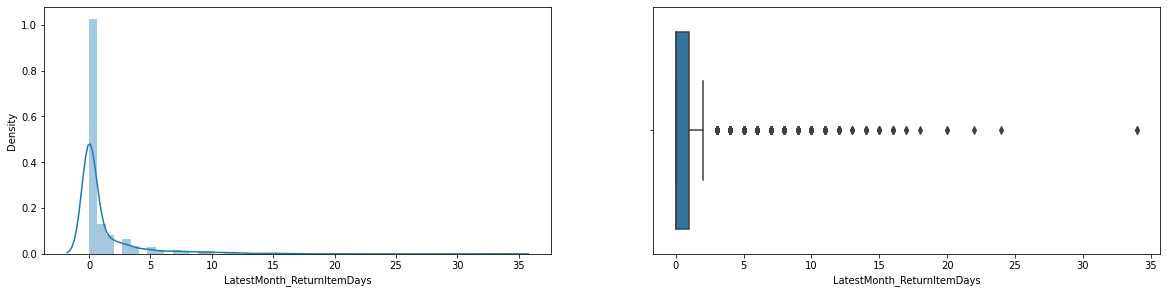

attribute_name : PctChangeInReveune
Description of attribute : 

count    3374.000000
mean       -0.043590
std         1.308412
min       -56.591706
25%        -0.084883
50%         0.071461
75%         0.231806
max         0.992493
Name: PctChangeInReveune, dtype: float64 

Value counts of attribute : 

 0.000000    50
 0.187927     1
 0.233523     1
-0.646786     1
 0.092358     1
             ..
-1.022059     1
 0.377977     1
 0.122055     1
 0.061118     1
 0.216665     1
Name: PctChangeInReveune, Length: 3325, dtype: int64 

Unique number of attribute : 

[ 0.18792731 -0.47750626 -0.09615778 ...  0.18275805  0.06675904
  0.21666549] 

Missing values in attribute : 

166 

Missing values in attribute_% : 

4.689265536723164 



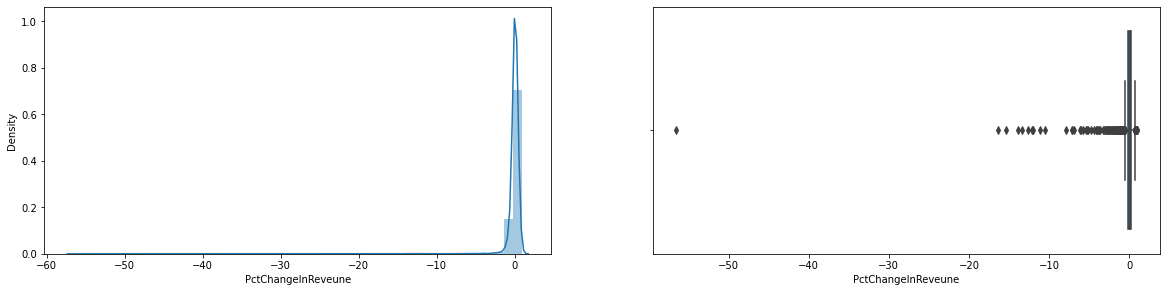

attribute_name : Renewal_PreviousAvgMonthRevenue
Description of attribute : 

count    3.399000e+03
mean     6.601225e+04
std      2.369841e+05
min      1.959940e+03
25%      1.522973e+04
50%      2.552900e+04
75%      5.281696e+04
max      9.840592e+06
Name: Renewal_PreviousAvgMonthRevenue, dtype: float64 

Value counts of attribute : 

36480.22     2
9240.30      2
39080.43     2
46248.83     2
27440.33     2
            ..
32693.79     1
17762.67     1
155159.52    1
45960.32     1
56610.12     1
Name: Renewal_PreviousAvgMonthRevenue, Length: 3345, dtype: int64 

Unique number of attribute : 

[11591.55 48957.16 48124.67 ...  8467.64 54203.26 56610.12] 

Missing values in attribute : 

141 

Missing values in attribute_% : 

3.9830508474576267 



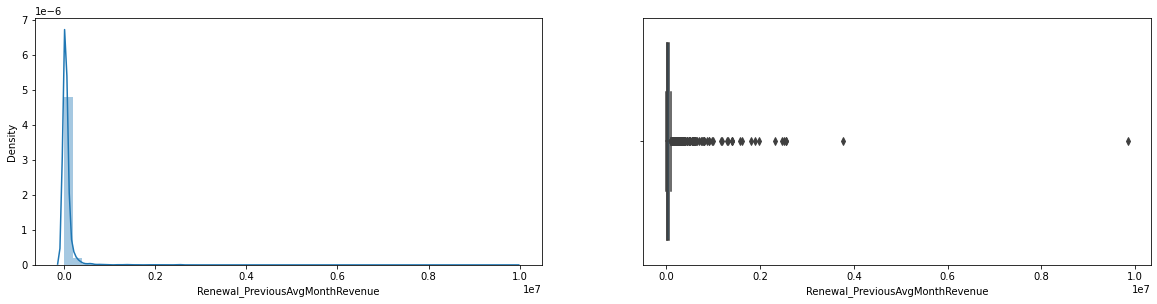

attribute_name : Renewal_PreviousAvgDailyBalance
Description of attribute : 

count    3.399000e+03
mean     1.085855e+04
std      5.001086e+04
min     -1.447103e+05
25%      1.739750e+03
50%      3.546400e+03
75%      7.997900e+03
max      2.450719e+06
Name: Renewal_PreviousAvgDailyBalance, dtype: float64 

Value counts of attribute : 

993.00      3
10657.50    2
798.33      2
1498.27     2
5645.38     2
           ..
13430.61    1
5852.38     1
256.00      1
14833.05    1
3063.65     1
Name: Renewal_PreviousAvgDailyBalance, Length: 3339, dtype: int64 

Unique number of attribute : 

[ 5221.7  16763.34  6008.67 ...   491.27  2934.72  3063.65] 

Missing values in attribute : 

141 

Missing values in attribute_% : 

3.9830508474576267 



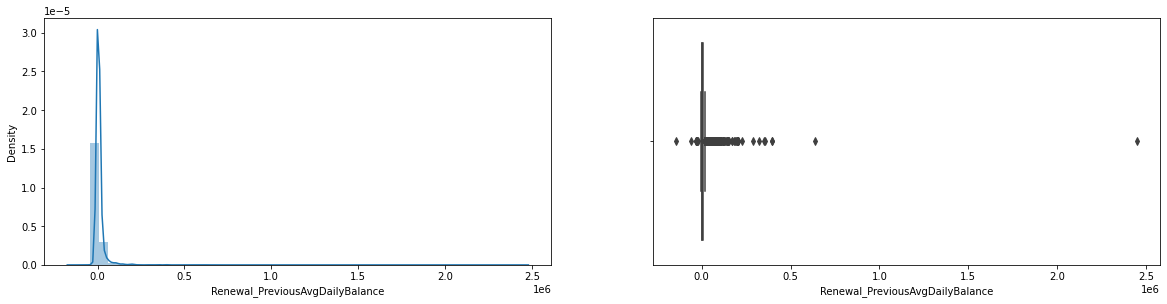

attribute_name : PctAvgDailybalance2AvgMonthlyDeposits
Description of attribute : 

count    3521.000000
mean        0.197554
std         0.314747
min        -0.255268
25%         0.062825
50%         0.118861
75%         0.215763
max         5.121541
Name: PctAvgDailybalance2AvgMonthlyDeposits, dtype: float64 

Value counts of attribute : 

0.013722    2
0.088380    2
0.223576    2
2.049500    2
0.137212    2
           ..
0.308507    1
0.101962    1
0.610147    1
0.344021    1
0.066065    1
Name: PctAvgDailybalance2AvgMonthlyDeposits, Length: 3511, dtype: int64 

Unique number of attribute : 

[0.26316674 0.47873668 0.05341178 ... 0.0470822  0.0202706  0.06606522] 

Missing values in attribute : 

19 

Missing values in attribute_% : 

0.5367231638418078 



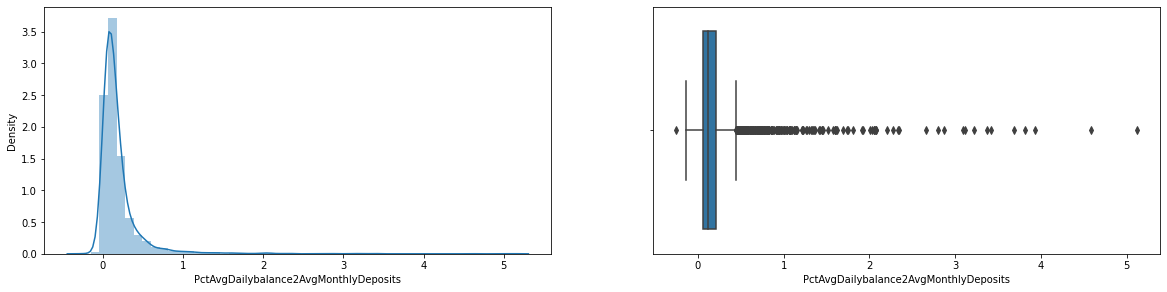

attribute_name : Avg_ReturnItemdays
Description of attribute : 

count    3521.000000
mean        0.855557
std         1.950353
min         0.000000
25%         0.000000
50%         0.000000
75%         0.666666
max        20.000000
Name: Avg_ReturnItemdays, dtype: float64 

Value counts of attribute : 

0.000000     2127
0.250000      176
0.333333      137
0.666666      114
1.000000      112
             ... 
7.666666        1
19.333333       1
14.666666       1
8.500000        1
13.000000       1
Name: Avg_ReturnItemdays, Length: 76, dtype: int64 

Unique number of attribute : 

[ 0.        4.25      0.5       3.5       9.        2.        0.666666
  3.        2.333333  1.333333  1.5       0.75      0.25      1.75
 10.5       5.666666  4.        0.333333  1.       11.        4.666666
  3.333333  1.666666  2.666666  8.75      3.666666  2.25      1.25
  2.5      12.        4.333333  5.75      8.333333  5.333333  3.25
  6.       18.333333  7.25      9.666666  6.666666 13.333333  4.75
  

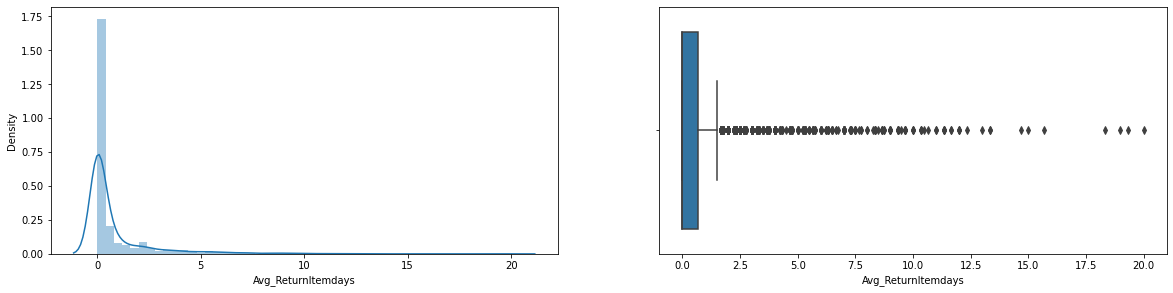

attribute_name : Last3Statments_MA_ReturnItemDays
Description of attribute : 

count    3521.000000
mean        0.846824
std         1.964641
min         0.000000
25%         0.000000
50%         0.000000
75%         0.666666
max        19.333333
Name: Last3Statments_MA_ReturnItemDays, dtype: float64 

Value counts of attribute : 

0.000000     2219
0.333333      294
0.666666      192
1.000000      136
1.333333       71
1.666666       64
2.000000       60
2.333333       59
3.000000       45
2.666666       43
3.666666       27
4.333333       24
0.500000       23
4.666666       21
3.333333       21
5.333333       21
4.000000       20
5.000000       16
7.000000       14
6.000000       13
5.666666       12
2.500000       10
6.333333       10
1.500000        9
8.333333        8
6.666666        8
7.333333        7
9.333333        6
10.333333       5
9.000000        5
8.666666        5
10.000000       4
6.500000        4
3.500000        4
9.666666        4
11.333333       4
5.500000        3


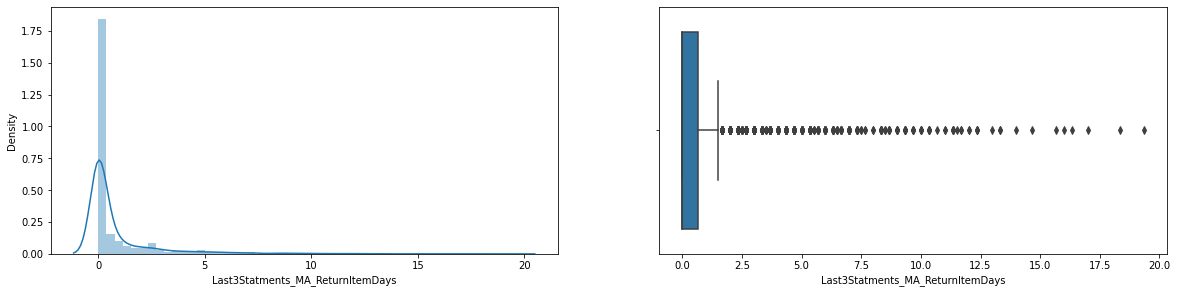

attribute_name : Last3Statments_MA_AvgDailyBalance
Description of attribute : 

count    3.521000e+03
mean     1.223232e+04
std      7.069950e+04
min     -1.365124e+05
25%      1.611050e+03
50%      3.529837e+03
75%      8.387573e+03
max      3.129067e+06
Name: Last3Statments_MA_AvgDailyBalance, dtype: float64 

Value counts of attribute : 

1398.103333     3
1808.756666     2
60523.316666    2
23828.256666    2
12361.333333    2
               ..
52670.246666    1
766.600000      1
1012.453333     1
16877.660000    1
4774.413333     1
Name: Last3Statments_MA_AvgDailyBalance, Length: 3423, dtype: int64 

Unique number of attribute : 

[ 3783.403333 10057.533333  2153.303333 ...   425.74      1177.333333
  4774.413333] 

Missing values in attribute : 

19 

Missing values in attribute_% : 

0.5367231638418078 



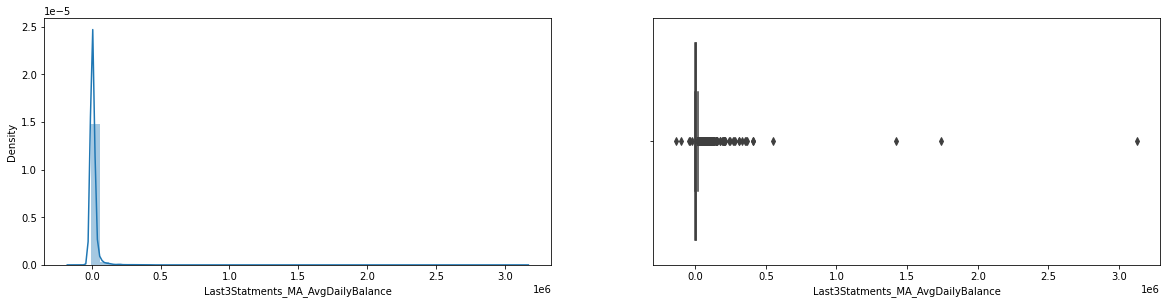

attribute_name : Last3Statments_MA_AdjustedMonthlyDeposits
Description of attribute : 

count    3.521000e+03
mean     7.886564e+04
std      3.251474e+05
min      1.220150e+02
25%      1.666600e+04
50%      2.921981e+04
75%      5.861595e+04
max      1.241704e+07
Name: Last3Statments_MA_AdjustedMonthlyDeposits, dtype: float64 

Value counts of attribute : 

9.113354e+04    2
2.122346e+06    2
4.757888e+04    2
4.475365e+04    2
4.933937e+04    2
               ..
9.846045e+04    1
9.293400e+03    1
2.312734e+04    1
4.490999e+04    1
7.226813e+04    1
Name: Last3Statments_MA_AdjustedMonthlyDeposits, Length: 3427, dtype: int64 

Unique number of attribute : 

[14310.066666 22123.96     59833.653333 ... 10269.233333 58080.666666
 72268.126666] 

Missing values in attribute : 

19 

Missing values in attribute_% : 

0.5367231638418078 



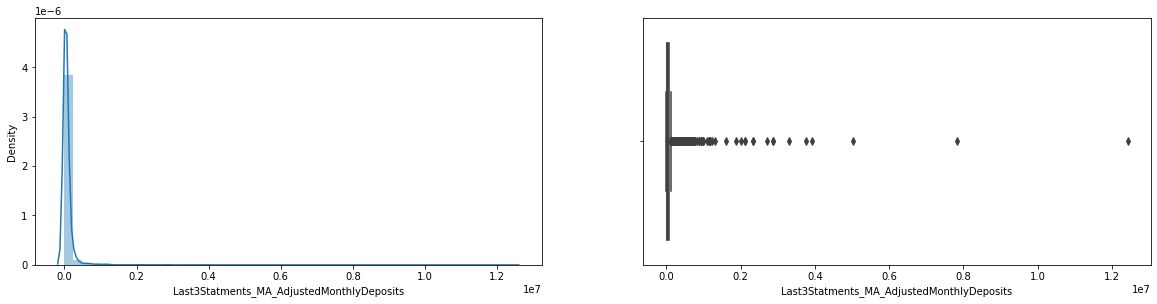

attribute_name : Renewal_PreviousPaidPercentageOfRTR
Description of attribute : 

count    3526.000000
mean        0.735942
std         0.257274
min         0.000000
25%         0.550000
50%         0.670000
75%         0.950000
max         2.150000
Name: Renewal_PreviousPaidPercentageOfRTR, dtype: float64 

Value counts of attribute : 

1.00    430
0.52    144
0.53    136
0.51    123
0.60    114
       ... 
1.53      1
0.07      1
1.56      1
1.58      1
1.95      1
Name: Renewal_PreviousPaidPercentageOfRTR, Length: 169, dtype: int64 

Unique number of attribute : 

[1.   0.67 0.86 0.61 0.59 0.22 0.52 0.05 0.96 0.63 0.6  0.5  0.7  0.31
 0.89 0.57 0.8  0.74 1.09 0.83 0.54 0.35 0.71 0.53 0.64 0.51 0.79 1.01
 0.26 0.34 0.78 0.55 0.56 0.91 0.87 0.88 0.72 1.03 1.11 0.75 0.66 0.94
 0.62 1.02 1.56 1.22 1.25 0.58 0.12 1.14 1.18 0.98 0.44 0.73 0.92 0.69
 0.81 0.77 1.41 0.9  0.93 0.68 0.24 0.65 0.36 0.49 1.17 1.37 0.42 1.31
 0.19 0.95 0.85 0.76 1.04 0.82 1.1  0.37 1.15 0.84 1.52 1.42 0.2  0.97


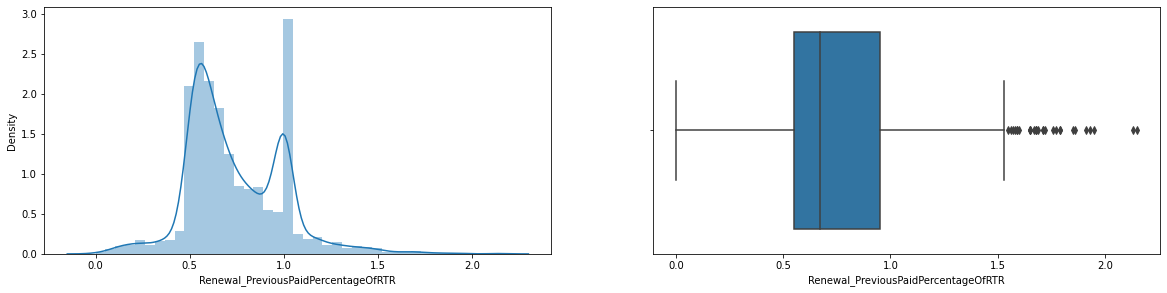

attribute_name : AdjustedMonthlyDeposits
Description of attribute : 

count    3.526000e+03
mean     7.690487e+04
std      3.428590e+05
min     -1.790000e+02
25%      1.543872e+04
50%      2.912270e+04
75%      5.860154e+04
max      1.585575e+07
Name: AdjustedMonthlyDeposits, dtype: float64 

Value counts of attribute : 

0.00         6
10027.00     3
10717.00     2
21430.00     2
13321.00     2
            ..
11881.00     1
31979.22     1
159226.43    1
57663.00     1
89719.28     1
Name: AdjustedMonthlyDeposits, Length: 3492, dtype: int64 

Unique number of attribute : 

[15413.96 14919.6  76940.4  ...  7721.89 52007.   89719.28] 

Missing values in attribute : 

14 

Missing values in attribute_% : 

0.39548022598870053 



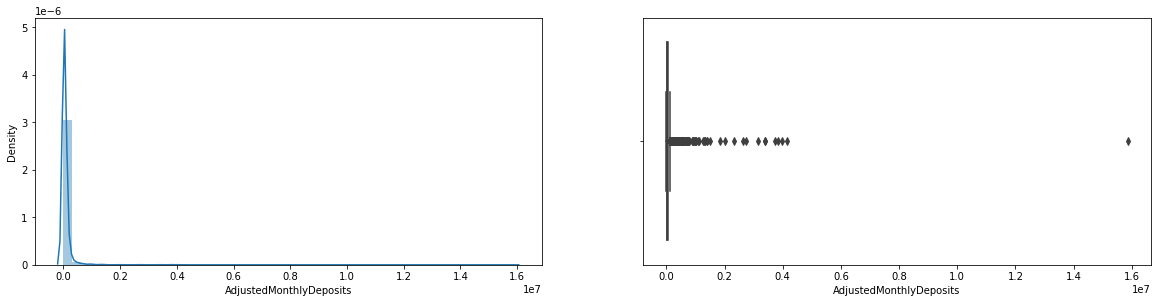

attribute_name : Credit_Score__c
Description of attribute : 

count    3521.000000
mean      550.687589
std       154.153158
min         0.000000
25%       533.000000
50%       579.000000
75%       623.000000
max       815.000000
Name: Credit_Score__c, dtype: float64 

Value counts of attribute : 

0.0      182
1.0       37
595.0     33
612.0     32
550.0     31
        ... 
767.0      1
722.0      1
756.0      1
796.0      1
419.0      1
Name: Credit_Score__c, Length: 322, dtype: int64 

Unique number of attribute : 

[590. 651. 563. 640. 579. 561. 555. 552. 503. 616. 477.   0. 599. 612.
 516. 594. 507. 489. 538. 688. 509. 536. 581. 664. 662. 583. 512. 587.
 632. 499. 582. 535. 678. 657. 667. 513. 645. 492. 532. 652. 597. 562.
 528. 546. 533. 570. 537. 574. 630. 610. 585. 589. 540. 577. 629. 752.
 515. 639. 501. 554. 588. 663. 609. 591. 491. 487. 603. 481. 534. 618.
 549. 684. 525. 580. 548. 551. 510. 575. 620. 458. 566.  nan 642. 643.
 500. 675. 544. 611. 595. 496. 497. 457. 622. 624

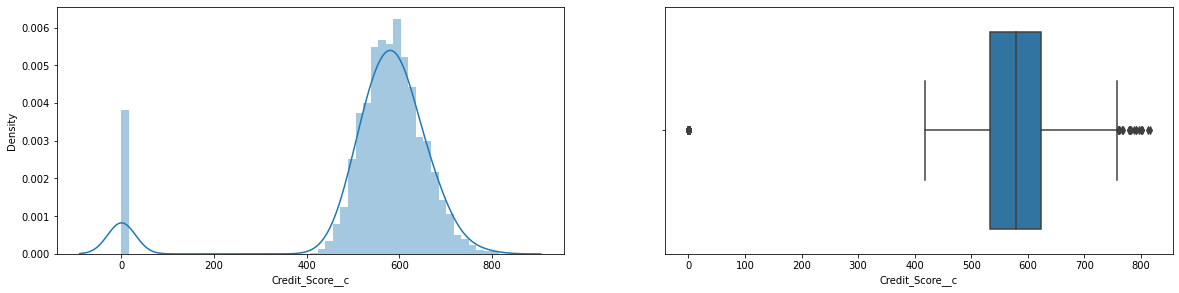

attribute_name : Renewal_PreviousPace
Description of attribute : 

count    3526.000000
mean       98.298341
std         7.092188
min        10.040000
25%       100.000000
50%       100.000000
75%       100.000000
max       100.000000
Name: Renewal_PreviousPace, dtype: float64 

Value counts of attribute : 

100.00    3162
88.00        4
77.27        3
96.30        3
88.89        3
          ... 
93.94        1
84.14        1
93.25        1
73.88        1
70.90        1
Name: Renewal_PreviousPace, Length: 325, dtype: int64 

Unique number of attribute : 

[100.    87.59  97.48  97.56  20.    93.75  58.66  77.85  69.03  71.97
  13.1   97.5   94.98  88.89  92.34  84.41  86.84  97.44  72.64  92.31
  82.54  61.4   75.11  77.14  99.24  90.16  68.    99.56  85.    96.88
  84.3   97.22  72.31  88.06  80.    94.52  97.24  69.23  55.2   90.98
  87.52  80.98  99.92  95.55  87.5   98.33    nan  90.48  88.53  89.74
  79.71  92.    91.67  98.08  98.65  99.57  98.17  65.53  82.    94.29
  67.13  97.

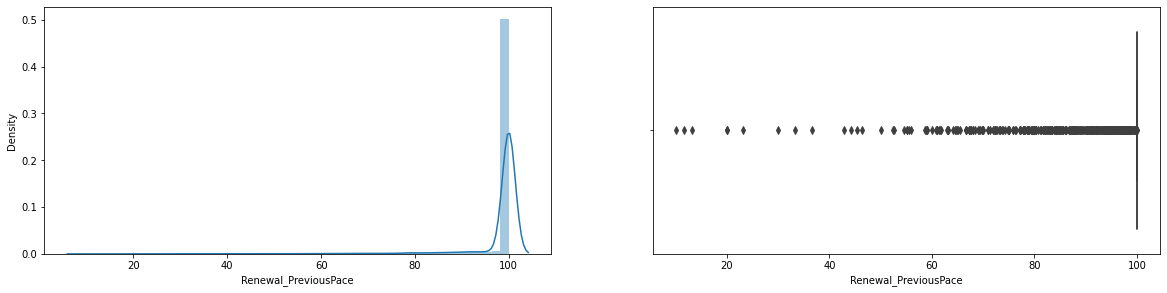

attribute_name : drop_percent
Description of attribute : 

count    3525.000000
mean       10.003286
std       104.565933
min      -384.435096
25%       -30.590242
50%        -5.865350
75%        27.125754
max      3000.881057
Name: drop_percent, dtype: float64 

Value counts of attribute : 

-24.476489     3
 11.201654     2
-39.375898     2
 111.572021    2
-12.536667     2
              ..
-66.898053     1
 5.950378      1
 115.411673    1
-69.664063     1
 41.195592     1
Name: drop_percent, Length: 3508, dtype: int64 

Unique number of attribute : 

[-12.604953 -68.455577  36.967089 ... -33.102758 -14.906532  41.195592] 

Missing values in attribute : 

15 

Missing values in attribute_% : 

0.423728813559322 



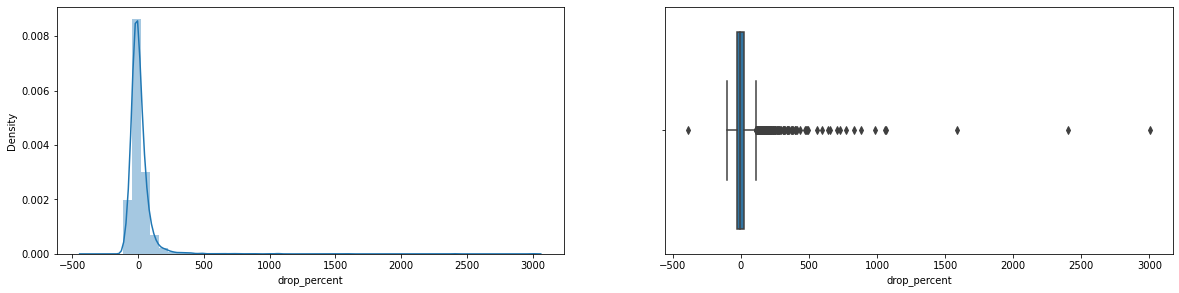

attribute_name : TwoMonthAvg_AdjustedMonthlyDeposits
Description of attribute : 

count    3.525000e+03
mean     7.671658e+04
std      2.263487e+05
min     -6.656000e+03
25%      1.739024e+04
50%      3.073034e+04
75%      6.156409e+04
max      5.447013e+06
Name: TwoMonthAvg_AdjustedMonthlyDeposits, dtype: float64 

Value counts of attribute : 

13276.658750     3
139320.647500    2
65258.556250     2
30730.338000     2
122891.825714    2
                ..
47383.834000     1
69263.420000     1
11213.740000     1
14845.630000     1
63542.550000     1
Name: TwoMonthAvg_AdjustedMonthlyDeposits, Length: 3507, dtype: int64 

Unique number of attribute : 

[17637.114    47297.095714 56174.371428 ... 11542.905    61117.5
 63542.55    ] 

Missing values in attribute : 

15 

Missing values in attribute_% : 

0.423728813559322 



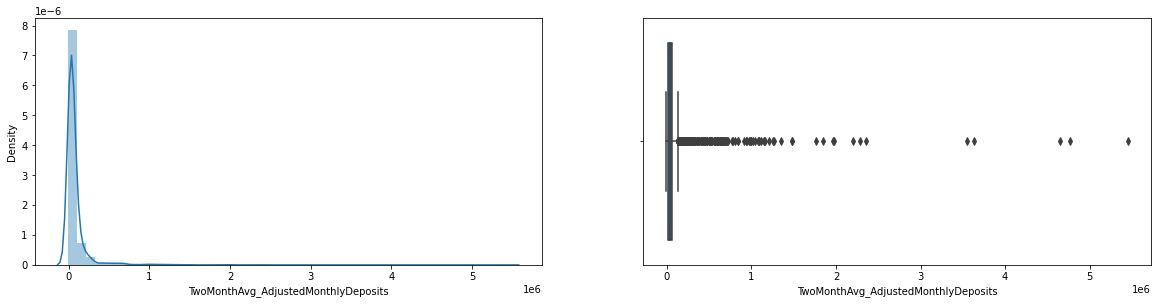

In [112]:
missing_attributes = ['LatestMonth_ReturnItemDays', 
                      'PctChangeInReveune', 
                      'Renewal_PreviousAvgMonthRevenue',
                      'Renewal_PreviousAvgDailyBalance',
                      'PctAvgDailybalance2AvgMonthlyDeposits',
                      'Avg_ReturnItemdays',
                      "Last3Statments_MA_ReturnItemDays",
                      "Last3Statments_MA_AvgDailyBalance",
                      'Last3Statments_MA_AdjustedMonthlyDeposits',
                      'Renewal_PreviousPaidPercentageOfRTR', 
                      'AdjustedMonthlyDeposits',                                              
                      'Credit_Score__c',                          
                      'Renewal_PreviousPace',
                      'drop_percent',
                      'TwoMonthAvg_AdjustedMonthlyDeposits']    

for col in missing_attributes:
  print('\033[1m'+'attribute_name :', col+'\033[0m')
  attribute_info(data[col])

In [116]:
missing_attributes = ['PctChangeInReveune', 
                      'Renewal_PreviousAvgMonthRevenue',
                      'Renewal_PreviousAvgDailyBalance',
                      'PctAvgDailybalance2AvgMonthlyDeposits',
                      'Avg_ReturnItemdays',
                      "Last3Statments_MA_ReturnItemDays",
                      "Last3Statments_MA_AvgDailyBalance",
                      'Last3Statments_MA_AdjustedMonthlyDeposits',
                      'Renewal_PreviousPaidPercentageOfRTR', 
                      'AdjustedMonthlyDeposits',                                              
                      'Credit_Score__c',                          
                      'Renewal_PreviousPace',
                      'drop_percent',
                      'TwoMonthAvg_AdjustedMonthlyDeposits']  

                      

In [117]:
# print('LatestMonth_ReturnItemDays :                   ', data['LatestMonth_ReturnItemDays'].median())
print('PctChangeInReveune :                           ', data['PctChangeInReveune'].median())
print('Renewal_PreviousAvgMonthRevenue :              ', data['Renewal_PreviousAvgMonthRevenue'].median())
print('Renewal_PreviousAvgDailyBalance :              ', data['Renewal_PreviousAvgDailyBalance'].median())
print('PctAvgDailybalance2AvgMonthlyDeposits :        ', data['PctAvgDailybalance2AvgMonthlyDeposits'].median())
print('Avg_ReturnItemdays :                           ', data['Avg_ReturnItemdays'].median())
print('Last3Statments_MA_ReturnItemDays :             ', data['Last3Statments_MA_ReturnItemDays'].median())
print('Last3Statments_MA_AvgDailyBalance :            ', data['Last3Statments_MA_AvgDailyBalance'].median())
print('Last3Statments_MA_AdjustedMonthlyDeposits :    ', data['Last3Statments_MA_AdjustedMonthlyDeposits'].median())
print('Renewal_PreviousPaidPercentageOfRTR :          ', data['Renewal_PreviousPaidPercentageOfRTR'].median())
print('AdjustedMonthlyDeposits :                      ', data['AdjustedMonthlyDeposits'].median())
print('Renewal_PreviousPace :                         ', data['Renewal_PreviousPace'].median())
print('drop_percent :                                 ', data['drop_percent'].median())
print('TwoMonthAvg_AdjustedMonthlyDeposits :          ', data['TwoMonthAvg_AdjustedMonthlyDeposits'].median())


PctChangeInReveune :                            0.071461330092687
Renewal_PreviousAvgMonthRevenue :               25529.0
Renewal_PreviousAvgDailyBalance :               3546.4
PctAvgDailybalance2AvgMonthlyDeposits :         0.118861002041963
Avg_ReturnItemdays :                            0.0
Last3Statments_MA_ReturnItemDays :              0.0
Last3Statments_MA_AvgDailyBalance :             3529.836666
Last3Statments_MA_AdjustedMonthlyDeposits :     29219.81
Renewal_PreviousPaidPercentageOfRTR :           0.67
AdjustedMonthlyDeposits :                       29122.7
Renewal_PreviousPace :                          100.0
drop_percent :                                  -5.86535
TwoMonthAvg_AdjustedMonthlyDeposits :           30730.338


In [115]:
credit_mean = data[(data['Credit_Score__c'] != 0) & (data['Credit_Score__c'] != 1)]['Credit_Score__c'].mean()
credit_mean

587.1998788612962

In [118]:
data['Renewal_PreviousPaidPercentageOfRTR'].fillna(data['Renewal_PreviousPaidPercentageOfRTR'].median(), inplace = True)
# data['LatestMonth_ReturnItemDays'].fillna(data['LatestMonth_ReturnItemDays'].median(),inplace = True)
data['PctChangeInReveune'].fillna(data['PctChangeInReveune'].median(),inplace = True)
data['PctAvgDailybalance2AvgMonthlyDeposits'].fillna(data['PctAvgDailybalance2AvgMonthlyDeposits'].median(),inplace = True)
data['Avg_ReturnItemdays'].fillna(data['Avg_ReturnItemdays'].median(),inplace = True)
data['Renewal_PreviousAvgMonthRevenue'].fillna(data['Renewal_PreviousAvgMonthRevenue'].median(),inplace = True)
data['Renewal_PreviousAvgDailyBalance'].fillna(data['Renewal_PreviousAvgDailyBalance'].median(),inplace = True)
data['Renewal_PreviousPace'].fillna(data['Renewal_PreviousPace'].median(),inplace = True)
data['drop_percent'].fillna(data['drop_percent'].median(),inplace = True)
data['TwoMonthAvg_AdjustedMonthlyDeposits'].fillna(data['TwoMonthAvg_AdjustedMonthlyDeposits'].median(),inplace = True)
data['AdjustedMonthlyDeposits'].fillna(data['AdjustedMonthlyDeposits'].median(),inplace = True)

data['Last3Statments_MA_ReturnItemDays'].fillna(data['Last3Statments_MA_ReturnItemDays'].median(),inplace = True)
data['Last3Statments_MA_AvgDailyBalance'].fillna(data['Last3Statments_MA_AvgDailyBalance'].median(),inplace = True)
data['Last3Statments_MA_AdjustedMonthlyDeposits'].fillna(data['Last3Statments_MA_AdjustedMonthlyDeposits'].median(),inplace = True)



In [119]:
credit_mean = data[(data['Credit_Score__c'] != 0) & (data['Credit_Score__c'] != 1)]['Credit_Score__c'].mean()
credit_mean

587.1998788612962

In [120]:
data['Credit_Score__c'].fillna(credit_mean,inplace = True)

In [122]:
# attribute_info(data['Credit_Score__c'])

In [123]:
data.isnull().sum().sort_values(ascending = False)/len(data)*100

LatestMonth_ReturnItemDays                    26.045198
OpportunityID_ren                              0.000000
Industry_Construction                          0.000000
WOGross_AdvanceBalance                         0.000000
Avg_ReturnItemdays                             0.000000
PctChangeInReveune                             0.000000
PctAvgDailybalance2AvgMonthlyDeposits          0.000000
TwoMonthAvg_AdjustedMonthlyDeposits            0.000000
AdjustedMonthlyDeposits                        0.000000
drop_percent                                   0.000000
Is_this_Business_home_based__c_Yes             0.000000
Industry_E-Commerce                            0.000000
Renewal_PreviousPace                           0.000000
Industry_Finance, Insurance, Real Estate       0.000000
Industry_Manufacturing                         0.000000
Industry_Mining                                0.000000
Industry_Retail                                0.000000
Industry_Services                              0

In [140]:
data['LatestMonth_ReturnItemDays'][:10]

0     0.0
1     NaN
2     NaN
3     0.0
4     0.0
5     NaN
6     0.0
7     2.0
8    11.0
9     NaN
Name: LatestMonth_ReturnItemDays, dtype: float64

In [139]:
null_return = data[data['LatestMonth_ReturnItemDays'].isna()].index
count = 0
for i in null_return:
    print(i)
    count += 1
print('\n')
print('Total null = ', count)


1
2
5
9
10
14
19
20
22
24
32
34
35
38
42
54
63
64
65
73
74
75
76
79
81
84
89
92
95
103
107
109
110
113
115
126
129
130
134
143
145
147
149
151
158
161
166
172
173
179
182
185
189
193
202
205
208
209
211
213
221
223
226
228
231
232
236
241
242
244
251
257
258
259
261
268
270
274
276
285
287
291
294
295
296
297
302
304
306
307
310
315
316
322
329
332
335
336
338
341
342
353
354
359
361
375
380
382
384
387
392
396
397
405
407
409
433
435
439
440
441
445
447
449
458
464
473
477
479
480
486
491
503
506
511
514
518
522
524
525
527
528
529
530
533
535
537
542
543
550
551
556
559
560
568
573
576
577
580
581
583
584
589
591
593
596
604
605
616
621
627
629
631
632
633
642
655
660
661
664
681
691
694
700
701
706
709
713
717
725
729
730
733
737
739
744
750
752
764
769
774
776
782
794
797
799
807
809
810
813
817
819
825
828
829
840
842
846
851
854
857
862
865
867
873
883
884
886
887
891
893
898
903
919
921
922
929
931
933
940
942
943
945
959
960
961
962
965
970
973
979
983
986
991
993
999
1003
1006

In [145]:
data['LatestMonth_ReturnItemDays'] = data['LatestMonth_ReturnItemDays'].fillna(-99999)

In [146]:
data['LatestMonth_ReturnItemDays']

0           0.0
1      -99999.0
2      -99999.0
3           0.0
4           0.0
         ...   
3535        0.0
3536        7.0
3537   -99999.0
3538   -99999.0
3539   -99999.0
Name: LatestMonth_ReturnItemDays, Length: 3540, dtype: float64

In [147]:
data['LatestMonth_ReturnItemDays_value'] = data["LatestMonth_ReturnItemDays"].apply(lambda x:0 if x < 0 else x)
data['LatestMonth_ReturnItemDays_flag'] = data["LatestMonth_ReturnItemDays"].apply(lambda x:1 if x < 0 else 0)

In [148]:
data.isnull().sum().sort_values(ascending = False)/len(data)*100

OpportunityID_ren                             0.0
Renewal_PreviousPace                          0.0
Avg_ReturnItemdays                            0.0
LatestMonth_ReturnItemDays                    0.0
PctChangeInReveune                            0.0
PctAvgDailybalance2AvgMonthlyDeposits         0.0
TwoMonthAvg_AdjustedMonthlyDeposits           0.0
AdjustedMonthlyDeposits                       0.0
drop_percent                                  0.0
Is_this_Business_home_based__c_Yes            0.0
Industry_Construction                         0.0
Industry_E-Commerce                           0.0
Industry_Finance, Insurance, Real Estate      0.0
Industry_Manufacturing                        0.0
Industry_Mining                               0.0
Industry_Retail                               0.0
Industry_Services                             0.0
Industry_Transportation & Public Utilities    0.0
Industry_Wholesale                            0.0
Industry_Wholesale Trade                      0.0


In [155]:
data.head(3)

,OpportunityID_ren,Renewal_PreviousPace,Renewal_PreviousPaidPercentageOfRTR,Renewal_CountPreviousDeals,Renewal_PreviousCountBounces,Renewal_PreviousPosition,Renewal_PreviousHBwLCF,Renewal_PreviousAvgMonthRevenue,Renewal_PreviousAvgDailyBalance,Renewal_TwoWeekBounces,...,Industry_Mining,Industry_Retail,Industry_Services,Industry_Transportation & Public Utilities,Industry_Wholesale,Industry_Wholesale Trade,Drop_category_Neutral/Null,Drop_category_Positive,LatestMonth_ReturnItemDays_value,LatestMonth_ReturnItemDays_flag
0,0062M00000mfyvzQAA,100.00,1.00,4,0,1,47.18,11591.55,5221.70,0,...,0,0,1,0,0,0,0,0,0.0,0
1,0062M00000oBKTtQAO,100.00,0.67,1,0,1,15.51,48957.16,16763.34,0,...,0,0,1,0,0,0,0,0,0.0,1
2,0062M00000jxpORQAY,87.59,0.86,3,8,1,20.49,48124.67,6008.67,0,...,0,0,1,0,0,0,0,1,0.0,1


In [156]:
data.shape

(3505, 48)

In [157]:
data.to_excel('/content/drive/MyDrive/LCF_Internal/Renewable_Model/EDA Approach-1/XGBoost Implementation/v11/Ren_final.xlsx', index = False)